# Visualizing Earnings Based On College Majors
## <span style='background :yellow' > By MANUEL LA CHICA MALDONADO </span>

The main question we are going to ask in this project is, Do earnings change drastically with the Major someone has chosen during their college days. We will try to answer this question with the help of various plot.

In order to help us analyse the earning potential of various College Majors, We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

## Importing Libraries
Since we are going to analyse these data points using plots, we will first import necessary libraries. In order to show the plot within Jupyter Notebook, we will add **%matplotlib inline** command.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the dataset and exploring the data

Let's read the dataset and explore the data getting the first row of the data set.

In [7]:
recent_grads = pd.read_csv('ProjectsDatasets/recent-grads.csv')
pd.set_option('display.max_columns', None) # Display all the columns of the dataset
pd.set_option('display.max_rows', None)    ## '' rows

print(recent_grads.iloc[0])


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


### Understanding the column names

On the Github repository there is an explanation of the column names:

| Column Name      | Description |
| ----------- | ----------- |
| Rank | Ranked in ascending order of the Median earning |
| Major_code | Code corresponding to each College Major |
| Major | Name of the College Major |
| Total | Total Number of people with a major |
| Men | Number of Men enrolled for a major |
| Women | Number of Women enrolled for a major |
| Major_category | Category under which the major falls |
| ShareWomen | Percentage of Women in a Major |
| Sample_size | Sample size (probably the colleges) used to collect the data |
| Employed | Total number of people employed |
| Full_time | Number of people who are employed full time, ie. working 35 hours or more per week |
| Part_time | Number of people who are employed part time, ie. working less than 35 hours per week |
| Full_time_year_round | Number of people who are Employed at least 50 weeks in a year for more than 35 hours per week |
| Unemployed | Total number of people who are unemployed |
| Unemployment_rate | Fraction obtained by calculting Unemployed / (Unemployed + Employed) |
| Median | Median value of earnings of full-time, year-round workers |
| P25th | 25th percentile of earnings of full-time, year-round workers |
| P75th | 75th percentile of earnings of full-time, year-round workers |
| College_jobs | Number of Jobs that require a college degree |
| Non_college_jobs | Number of Jobs that does not require a college degree |
| Low_wage_jobs | Number of Low wage jobs |

**Now let us look at the top end and bottom end of the dataset**

In [8]:
recent_grads.head()  # Printing the first 5 rows

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [9]:
recent_grads.tail()    # Printing the last 5 rows

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


## Obtaining some stats per column

In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Cleaning the Dataset
Looks like there are a few data missing in certain column. Let us check that and drop the rows containing missing values.

In [11]:
print(len(recent_grads))
recent_grads=recent_grads.dropna()  # dropping nan values
print(len(recent_grads))

172
172


So we have successfully removed the missing values and now the dataset has 172 rows. Let us check and confirm this.



In [12]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

## Pandas and Scatter Plots


**1) "Sample_size" and "Median"**

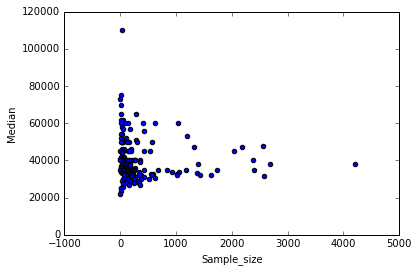

In [4]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
plt.show()

**2) "Sample_size" and "Unemployment_rate"**

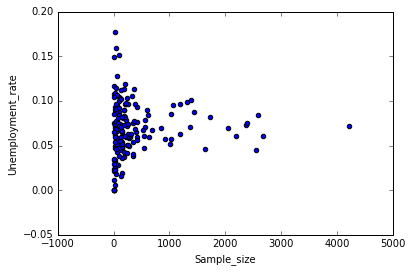

In [5]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
plt.show()

**3) "Full_time" and "Median"**

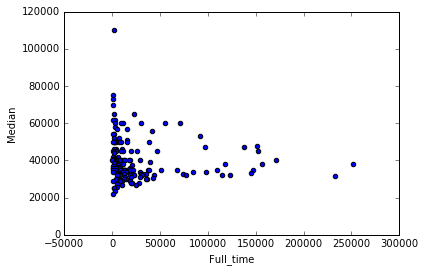

In [6]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
plt.show()

**4) "ShareWomen" and "Unemployment_rate"**

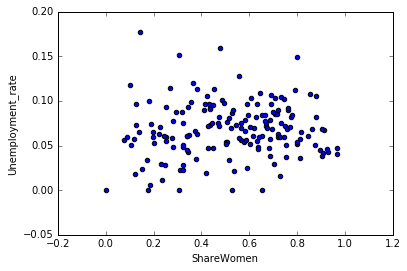

In [7]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
plt.show()

**5) "Men" and "Median"**

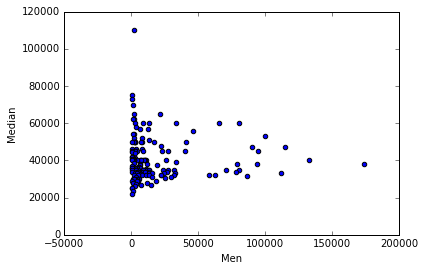

In [8]:
recent_grads.plot(x='Men', y='Median', kind='scatter')
plt.show()

**6) "Women" and "Median"**

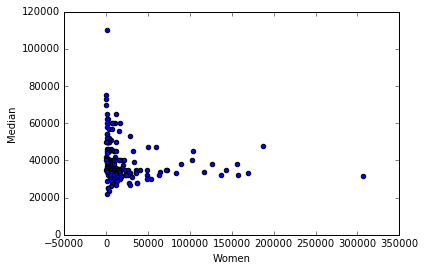

In [9]:
recent_grads.plot(x='Women', y='Median', kind='scatter')
plt.show()

Use the plots to explore the following questions:

* Do students in more popular majors make more money?

* Do students that majored in subjects that were majority female make more money?

* Is there any link between the number of full-time employees and median salary?

## Pandas and Histograms

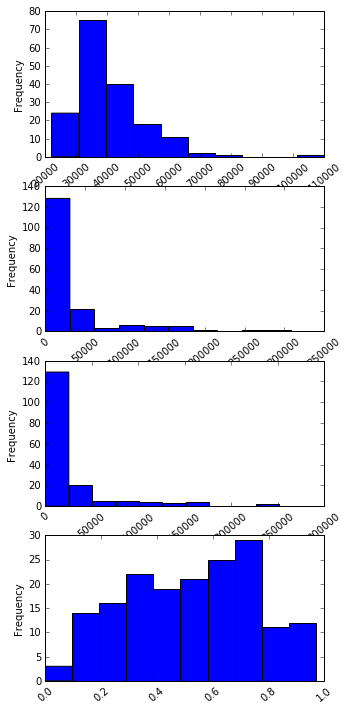

In [10]:
# USING A FOR LOOP TO GENERATE THE 4 FIRST PLOTS

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

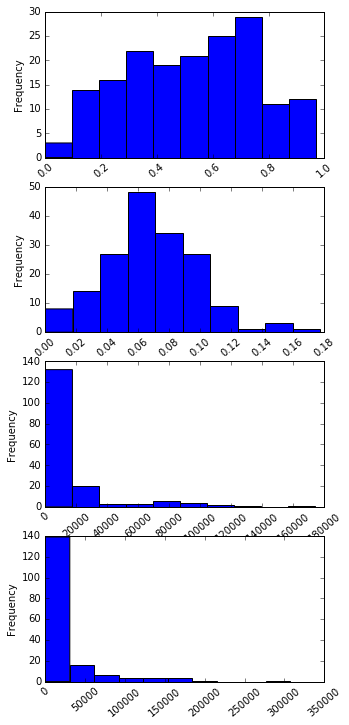

In [11]:
# LAST 4 PLOTS USING THE FOR LOOP

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

**1) "Sample_size"**

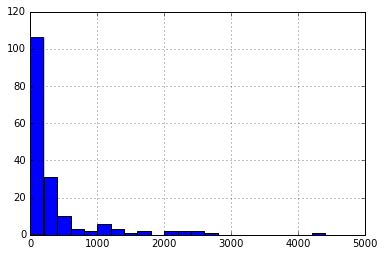

In [12]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
plt.show()

**2) "Median"**

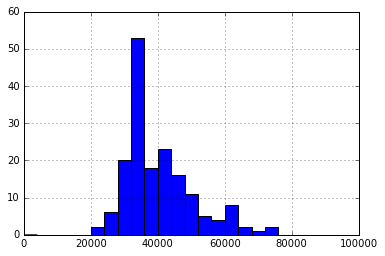

In [13]:
recent_grads['Median'].hist(bins=25, range=(0,100000))
plt.show()

**3) "Employed"**

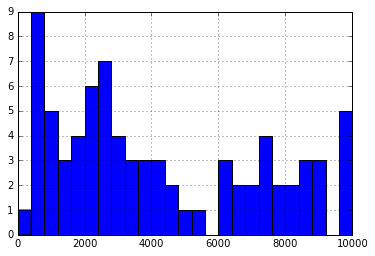

In [14]:
recent_grads['Employed'].hist(bins=25, range=(0,10000))
plt.show()

**4) "Full_Time"**

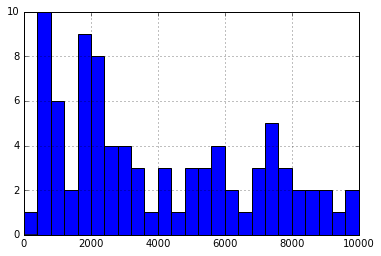

In [15]:
recent_grads['Full_time'].hist(bins=25, range=(0,10000))
plt.show()

** ....... **

Use the plots to explore the following questions:

* What percent of majors are predominantly male? Predominantly female?
* What's the most common median salary range?

## Pandas, Scatter Matrix Plot

** 2 by 2 scatter matrix plot using the "Sample_size" and "Median columns" **

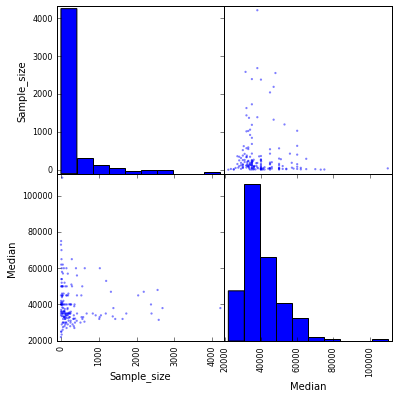

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))
plt.show()

** 3 by 3 scatter matrix plot using the "Sample_size", "Median", and "Unemployment_rate" columns **

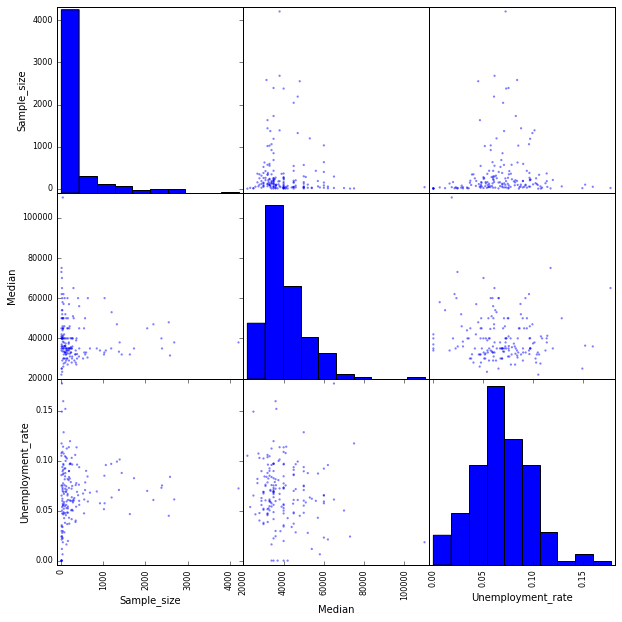

In [17]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))
plt.show()

## Pandas and Bar Plots

** Percentages of women **

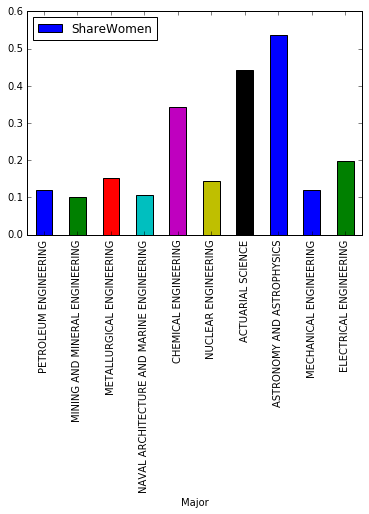

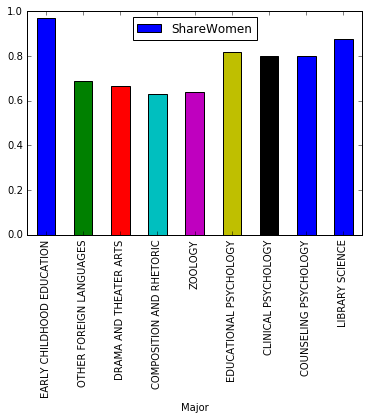

In [22]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[163:].plot.bar(x='Major', y='ShareWomen')
plt.show()

** Unemployment rate **

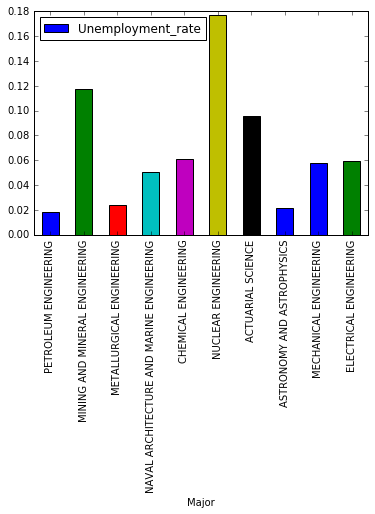

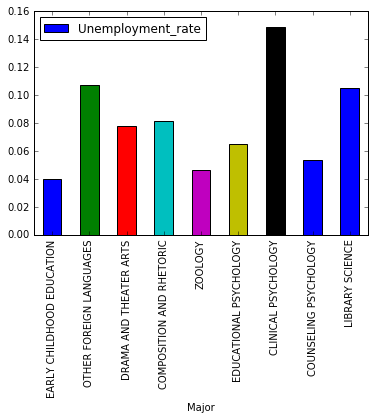

In [23]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate')
plt.show()